## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
from tensorflow import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
x_train.shape[-1]

3072

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(x_train.shape[-1])
    num_neurons=[512,256,128]
    
    for i, n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(n, activation='relu')(input_layer)
        else:
            x = keras.layers.Dense(n, activation='relu')(x)
        
        out = keras.layers.Dense(10, activation='softmax')(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [7]:
model = build_mlp()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.65]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    for m in MOMENTUM:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp()
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 2s 8ms/step - loss: 2.0467 - ac

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1128 - accuracy: 0.2255 - val_loss: 2.0186 - val_accuracy: 0.2685
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8556 - accuracy: 0.3296 - val_loss: 1.8698 - val_accuracy: 0.3252
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7413 - accuracy: 0.3761 - val_loss: 1.7253 - val_accuracy: 0.3724
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6819 - accuracy: 0.3978 - val_loss: 1.6725 - val_accuracy: 0.4032
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6263 - accuracy: 0.4167 - val_loss: 1.6041 - val_accuracy: 0.4284
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5837 - accuracy: 0.4312 - val_loss: 1.6445 - val_accuracy: 0.4057
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5324 - accuracy: 0.4520 - val_loss: 1.5839 - val_accuracy: 0.4211
Epoch 

196/196 [==============================] - 1s 5ms/step - loss: 1.8268 - accuracy: 0.3447 - val_loss: 1.7182 - val_accuracy: 0.3800
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5997 - accuracy: 0.4308 - val_loss: 1.6544 - val_accuracy: 0.4171
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5137 - accuracy: 0.4622 - val_loss: 1.5763 - val_accuracy: 0.4434
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4462 - accuracy: 0.4849 - val_loss: 1.5954 - val_accuracy: 0.4307
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.4004 - accuracy: 0.5022 - val_loss: 1.4494 - val_accuracy: 0.4830
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.3550 - accuracy: 0.5202 - val_loss: 1.4209 - val_accuracy: 0.4861
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.3223 - accuracy: 0.5294 - val_loss: 1.3986 - val_accuracy: 0.5078
Epoch 8/50
196/19

196/196 [==============================] - 1s 7ms/step - loss: 1.9580 - accuracy: 0.3012 - val_loss: 1.9096 - val_accuracy: 0.3134
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7787 - accuracy: 0.3711 - val_loss: 1.7242 - val_accuracy: 0.3810
Epoch 3/50
196/196 [==============================] - 1s 7ms/step - loss: 1.6978 - accuracy: 0.4030 - val_loss: 1.7140 - val_accuracy: 0.3974
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6525 - accuracy: 0.4166 - val_loss: 1.6170 - val_accuracy: 0.4276
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6026 - accuracy: 0.4327 - val_loss: 1.6906 - val_accuracy: 0.3884
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5670 - accuracy: 0.4453 - val_loss: 1.5643 - val_accuracy: 0.4464
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5351 - accuracy: 0.4591 - val_loss: 1.5625 - val_accuracy: 0.4477
Epoch 8/50
196/19

196/196 [==============================] - 1s 6ms/step - loss: 2.0299 - accuracy: 0.2732 - val_loss: 1.8623 - val_accuracy: 0.3475
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8043 - accuracy: 0.3652 - val_loss: 1.7746 - val_accuracy: 0.3708
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.7235 - accuracy: 0.3970 - val_loss: 1.7057 - val_accuracy: 0.3968
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6661 - accuracy: 0.4165 - val_loss: 1.6457 - val_accuracy: 0.4226
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.6175 - accuracy: 0.4350 - val_loss: 1.6079 - val_accuracy: 0.4349
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5774 - accuracy: 0.4486 - val_loss: 1.5705 - val_accuracy: 0.4444
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.5418 - accuracy: 0.4601 - val_loss: 1.5416 - val_accuracy: 0.4574
Epoch 8/50
196/19

196/196 [==============================] - 1s 7ms/step - loss: 2.2155 - accuracy: 0.2006 - val_loss: 2.1279 - val_accuracy: 0.2674
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0695 - accuracy: 0.2777 - val_loss: 2.0145 - val_accuracy: 0.3016
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9778 - accuracy: 0.3132 - val_loss: 1.9438 - val_accuracy: 0.3228
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9209 - accuracy: 0.3328 - val_loss: 1.9025 - val_accuracy: 0.3408
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8818 - accuracy: 0.3488 - val_loss: 1.8676 - val_accuracy: 0.3514
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8528 - accuracy: 0.3573 - val_loss: 1.8410 - val_accuracy: 0.3597
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.8286 - accuracy: 0.3650 - val_loss: 1.8262 - val_accuracy: 0.3636
Epoch 8/50
196/19

196/196 [==============================] - 1s 6ms/step - loss: 2.2285 - accuracy: 0.1870 - val_loss: 2.1493 - val_accuracy: 0.2363
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.0969 - accuracy: 0.2579 - val_loss: 2.0538 - val_accuracy: 0.2705
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.0197 - accuracy: 0.2872 - val_loss: 1.9931 - val_accuracy: 0.2880
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9691 - accuracy: 0.3045 - val_loss: 1.9495 - val_accuracy: 0.3161
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9310 - accuracy: 0.3226 - val_loss: 1.9179 - val_accuracy: 0.3290
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 1.9021 - accuracy: 0.3327 - val_loss: 1.8904 - val_accuracy: 0.3394
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 1.8782 - accuracy: 0.3448 - val_loss: 1.8686 - val_accuracy: 0.3453
Epoch 8/50
196/19

196/196 [==============================] - 2s 11ms/step - loss: 2.3261 - accuracy: 0.1260 - val_loss: 2.2858 - val_accuracy: 0.1444
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.2663 - accuracy: 0.1546 - val_loss: 2.2542 - val_accuracy: 0.1677
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2389 - accuracy: 0.1768 - val_loss: 2.2295 - val_accuracy: 0.1863
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2159 - accuracy: 0.1966 - val_loss: 2.2077 - val_accuracy: 0.2053
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1951 - accuracy: 0.2110 - val_loss: 2.1877 - val_accuracy: 0.2218
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1759 - accuracy: 0.2258 - val_loss: 2.1691 - val_accuracy: 0.2335
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1581 - accuracy: 0.2351 - val_loss: 2.1518 - val_accuracy: 0.2442
Epoch 8/50
196/1

196/196 [==============================] - 1s 6ms/step - loss: 2.3305 - accuracy: 0.1020 - val_loss: 2.2897 - val_accuracy: 0.1391
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2748 - accuracy: 0.1473 - val_loss: 2.2633 - val_accuracy: 0.1651
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2534 - accuracy: 0.1712 - val_loss: 2.2448 - val_accuracy: 0.1826
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2367 - accuracy: 0.1895 - val_loss: 2.2295 - val_accuracy: 0.2016
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2224 - accuracy: 0.2029 - val_loss: 2.2160 - val_accuracy: 0.2146
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2095 - accuracy: 0.2160 - val_loss: 2.2037 - val_accuracy: 0.2211
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 2.1976 - accuracy: 0.2222 - val_loss: 2.1921 - val_accuracy: 0.2269
Epoch 8/50
196/19

196/196 [==============================] - 1s 5ms/step - loss: 2.3616 - accuracy: 0.1166 - val_loss: 2.3485 - val_accuracy: 0.1196
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3380 - accuracy: 0.1214 - val_loss: 2.3294 - val_accuracy: 0.1212
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3220 - accuracy: 0.1222 - val_loss: 2.3159 - val_accuracy: 0.1257
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3103 - accuracy: 0.1228 - val_loss: 2.3058 - val_accuracy: 0.1250
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 2.3013 - accuracy: 0.1246 - val_loss: 2.2978 - val_accuracy: 0.1267
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2940 - accuracy: 0.1256 - val_loss: 2.2912 - val_accuracy: 0.1285
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 2.2878 - accuracy: 0.1267 - val_loss: 2.2855 - val_accuracy: 0.1294
Epoch 8/50
196/19

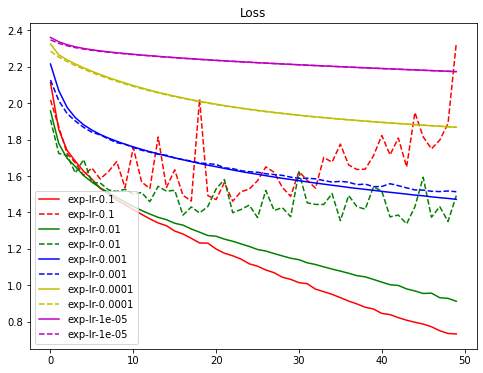

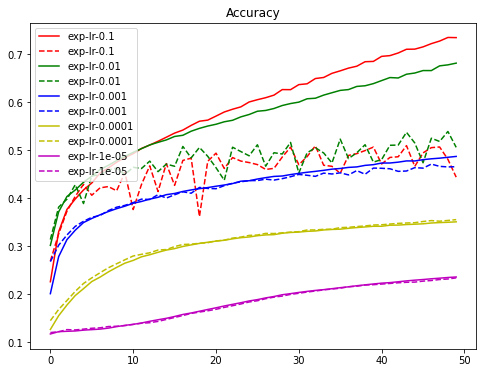

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()